In [2]:
from main import *
from useful_functions import *
from visualization import *
from stats import *

from brainspace.gradient.embedding import DiffusionMaps, diffusion_mapping
from scipy.stats import spearmanr
from brainsmash.mapgen.base import Base

%matplotlib inline
plt.rcParams['font.size'] = 18

In [10]:
top_directory = '/media/anleg84/Backup Plus/CERVO/Data/Networks2024/'
atlas_path = '/home/anleg84/Documents/Atlas/MapzebrainOld/'
save_path = '/home/anleg84/Documents/Figures/PaperNetworks2024/Supplementary/'

atlas = MapzebrainAtlas(atlas_path)
excluded = np.load('Results/excluded_regions.npy')
centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
centroids[:, 1] = 974 - centroids[:, 1]

datasets = get_datasets(top_directory, keywords=['920nm'], exclude=[])

delete = delete_rows_and_columns

# Supplementary figure: Forebrain gradient

In [283]:
def compute_gradients(matrix, n_components=None, random_state=None, alpha=0.5):
    if n_components is None:
        n_components = matrix.shape[0] - 1
    gradients, eigenvalues = diffusion_mapping(matrix, n_components=n_components, alpha=alpha, random_state=random_state)
    return gradients.T, eigenvalues


def get_embedding_colors(gradient1, gradient2, exponent=0.4):
    
    coords = np.stack([gradient1, gradient2], axis=1)
    dist = np.sqrt(np.sum(coords ** 2, axis=1)) ** exponent
    dist /= np.max(dist)
    dist = np.expand_dims(dist, axis=1)
    
    blue = np.copy(gradient1)
    blue[blue < 0] = 0
    blue /= np.max(blue)
    
    green = np.copy(gradient1)
    green[green > 0] = 0
    green *= -1
    green /= np.max(green)
    
    red = np.copy(gradient2)
    red -= np.min(red)
    red /= np.max(red)
    
    colors = np.stack([red, green, blue], axis=1)
    
    return colors

In [199]:
SC = np.load('Data/undirected_terminals_expanded.npy')

FC = np.load('Results/FC_matrix.npy')
FC_stim = np.load('Results/figure6_FC_stim.npy')
FC_hi = np.load('Results/figure6_FC_hires_spontaneous.npy')
FC_hi_stim = np.load('Results/figure6_FC_hires_stim.npy')

c_lo = np.delete(centroids, np.concatenate([excluded, excluded + 70]), axis=0) # Node coordinates, low-resolution
c_hi = np.load('Results/figure6_supp_centroids_hires.npy') # Node coordinates, high-resolution

#### Spontaneous FC

In [306]:
gradients, eigvals = compute_gradients(np.abs(FC), random_state=10)

/home/anleg84/anaconda3/envs/calimba/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


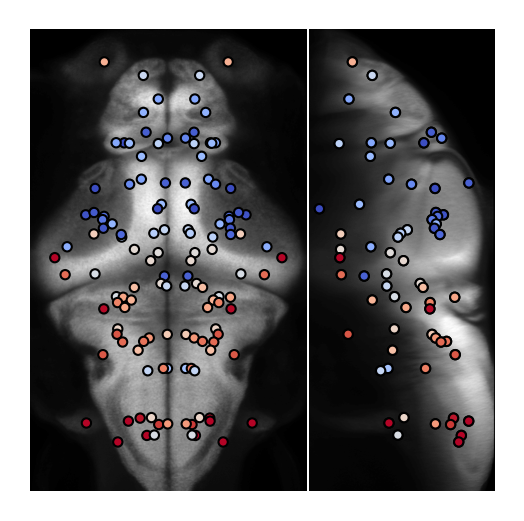

In [307]:
values = gradients[0]
v = np.percentile(np.abs(values), 90)

plot_regional_values(values, atlas, excluded=excluded, double_vector=True, cmap='coolwarm', vmin=-v, vmax=v)
%matplotlib inline

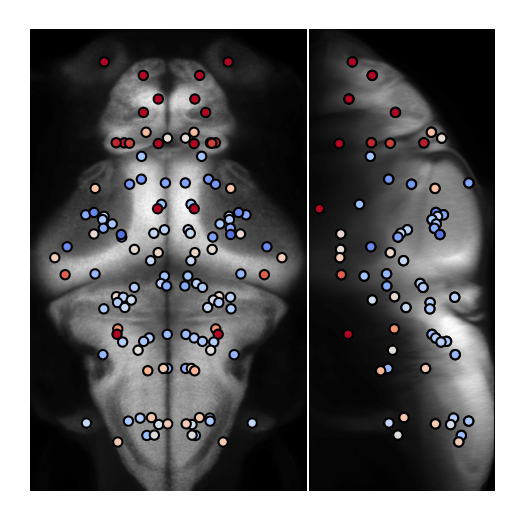

In [308]:
values = gradients[2]
v = np.percentile(np.abs(values), 90)

plot_regional_values(values, atlas, excluded=excluded, double_vector=True, cmap='coolwarm', vmin=-v, vmax=v)
%matplotlib inline

In [309]:
print(eigvals[0] / eigvals[1])
print(eigvals[1] / eigvals[2])

2.5478115753308197
1.3461974684390743


In [310]:
gradient1_lo = np.copy(-gradients[0])
gradient2_lo = np.copy(gradients[2])
eigvals_lo = np.copy(eigvals)

In [311]:
colors = get_embedding_colors(gradient1_lo, gradient2_lo)

Text(0, 0.5, 'Gradient 2')

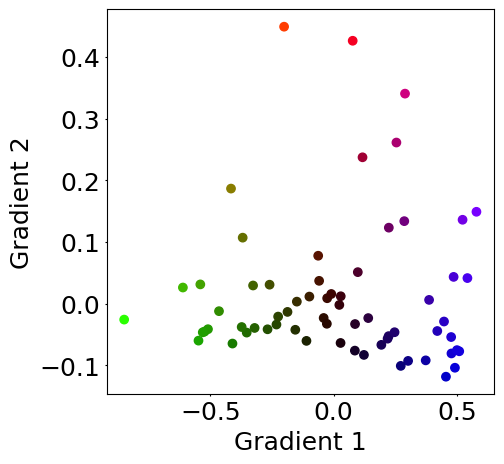

In [313]:
plt.figure(figsize=(5, 5))
plt.scatter(gradient1_lo, gradient2_lo, color=colors)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')

#### Stimulated FC

In [315]:
gradients, eigvals = compute_gradients(np.abs(FC_stim), random_state=10)

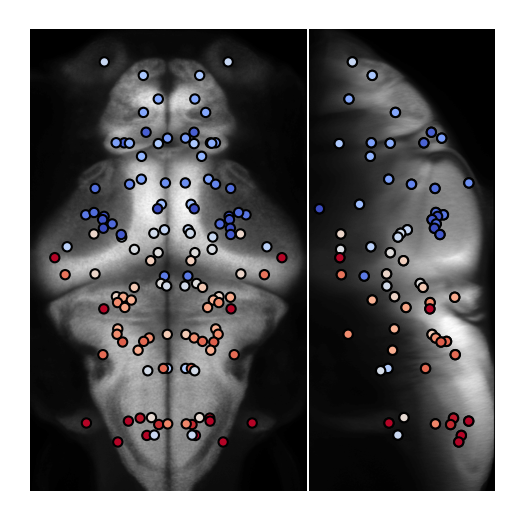

In [316]:
values = gradients[0]
v = np.percentile(np.abs(values), 90)

plot_regional_values(values, atlas, excluded=excluded, double_vector=True, cmap='coolwarm', vmin=-v, vmax=v)
%matplotlib inline

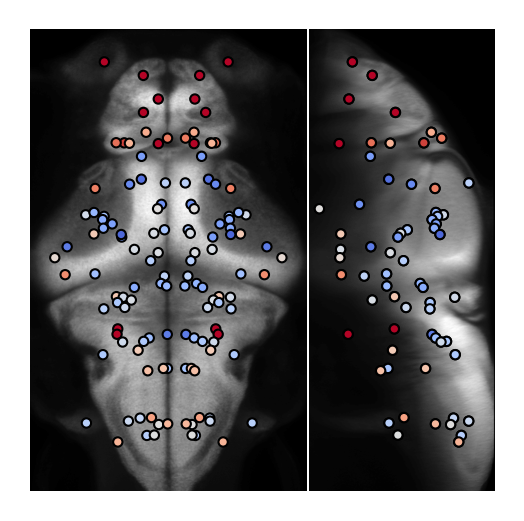

In [317]:
values = gradients[2]
v = np.percentile(np.abs(values), 90)

plot_regional_values(values, atlas, excluded=excluded, double_vector=True, cmap='coolwarm', vmin=-v, vmax=v)
%matplotlib inline

In [318]:
print(eigvals[0] / eigvals[1])
print(eigvals[1] / eigvals[2])

3.237238124914198
1.491177471481775


In [319]:
gradient1_lo_stim = np.copy(-gradients[0])
gradient2_lo_stim = np.copy(gradients[2])
eigvals_lo_stim = np.copy(eigvals)

In [320]:
colors = get_embedding_colors(gradient1_lo_stim, gradient2_lo_stim)

Text(0, 0.5, 'Gradient 2')

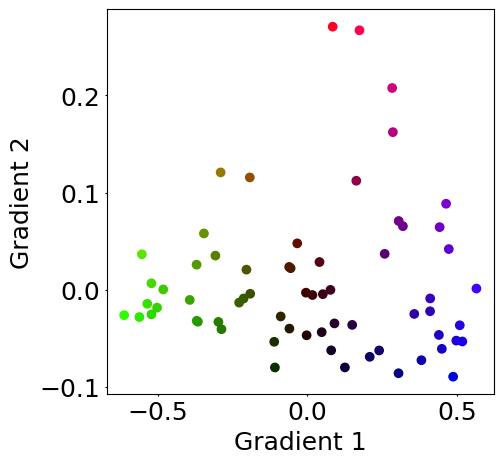

In [321]:
plt.figure(figsize=(5, 5))
plt.scatter(gradient1_lo_stim, gradient2_lo_stim, color=colors)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')

#### Spontaneous FC, high-res

In [322]:
gradients, eigvals = compute_gradients(np.abs(FC_hi), random_state=10)

In [323]:
%matplotlib inline

(-0.5, 596.5, 973.5, -0.5)

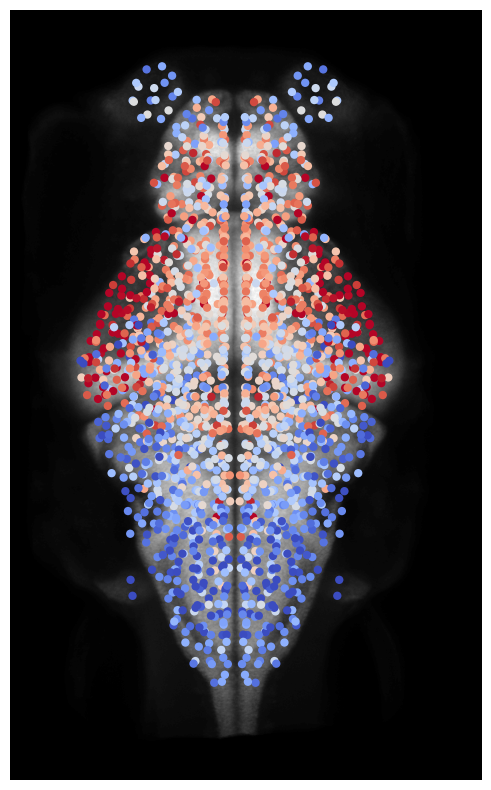

In [324]:
values = gradients[0]
v = np.percentile(np.abs(values), 90)

plt.figure(figsize=(10, 10))
plt.imshow(atlas.XYprojection, cmap='gray')
plt.scatter(c_hi[:, 0], c_hi[:, 1], edgecolor='None', c=double(values), cmap='coolwarm', vmin=-v, vmax=v)
plt.axis('off')

(-0.5, 596.5, 973.5, -0.5)

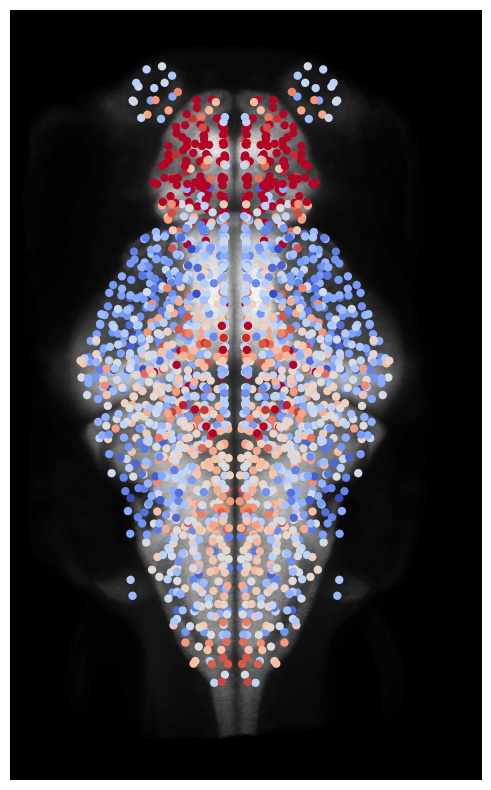

In [325]:
values = gradients[2]
v = np.percentile(np.abs(values), 90)

plt.figure(figsize=(10, 10))
plt.imshow(atlas.XYprojection, cmap='gray')
plt.scatter(c_hi[:, 0], c_hi[:, 1], edgecolor='None', c=double(values), cmap='coolwarm', vmin=-v, vmax=v)
plt.axis('off')

In [326]:
print(eigvals[0] / eigvals[1])
print(eigvals[1] / eigvals[2])

1.3941037499342581
1.460411009795796


In [328]:
gradient1_hi = np.copy(gradients[0])
gradient2_hi = np.copy(gradients[2])
eigvals_hi = np.copy(eigvals)

In [329]:
colors = get_embedding_colors(gradient1_hi, gradient2_hi)

Text(0, 0.5, 'Gradient 2')

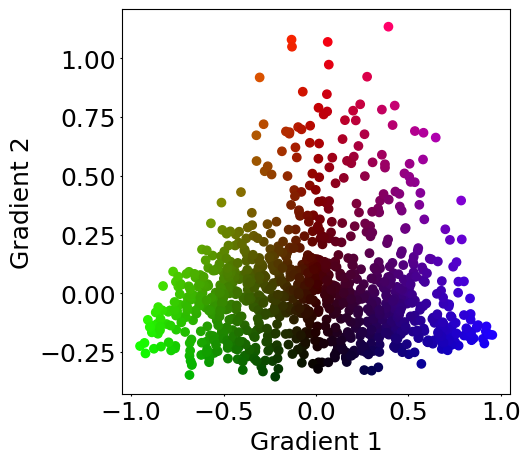

In [330]:
plt.figure(figsize=(5, 5))
plt.scatter(gradient1_hi, gradient2_hi, color=colors)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')

#### Stimulated FC, high-res

In [332]:
gradients, eigvals = compute_gradients(np.abs(FC_hi_stim), random_state=10)

In [333]:
%matplotlib inline

(-0.5, 596.5, 973.5, -0.5)

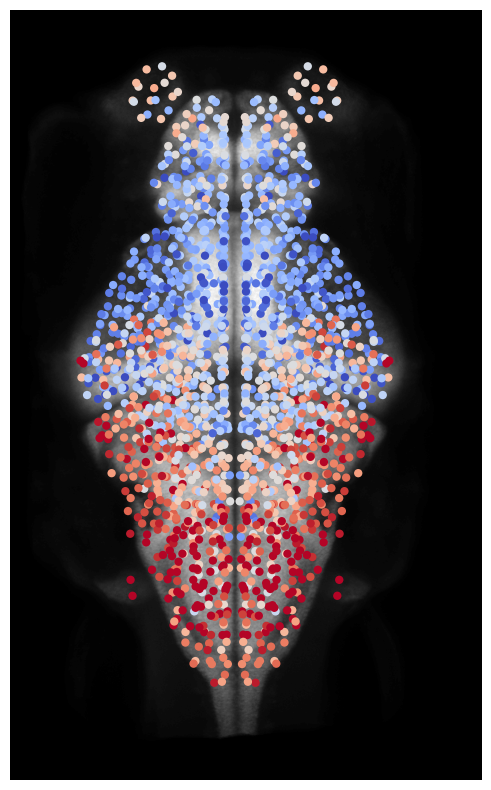

In [334]:
values = gradients[0]
v = np.percentile(np.abs(values), 90)

plt.figure(figsize=(10, 10))
plt.imshow(atlas.XYprojection, cmap='gray')
plt.scatter(c_hi[:, 0], c_hi[:, 1], edgecolor='None', c=double(values), cmap='coolwarm', vmin=-v, vmax=v)
plt.axis('off')

(-0.5, 596.5, 973.5, -0.5)

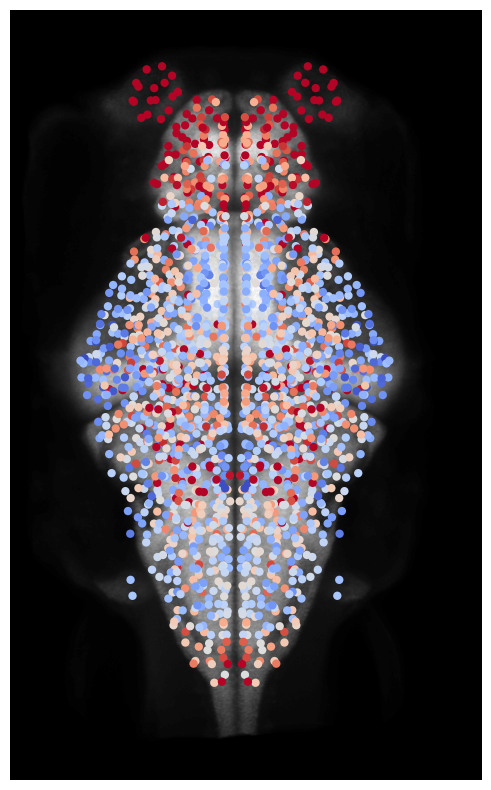

In [347]:
values = gradients[1]
v = np.percentile(np.abs(values), 90)

plt.figure(figsize=(10, 10))
plt.imshow(atlas.XYprojection, cmap='gray')
plt.scatter(c_hi[:, 0], c_hi[:, 1], edgecolor='None', c=double(values), cmap='coolwarm', vmin=-v, vmax=v)
plt.axis('off')

In [348]:
print(eigvals[0] / eigvals[1])
print(eigvals[1] / eigvals[2])

1.8219185420541573
1.2395158971986102


In [351]:
gradient1_hi_stim = np.copy(-gradients[0])
gradient2_hi_stim = np.copy(gradients[1])
eigvals_hi_stim = np.copy(eigvals)

In [353]:
colors = get_embedding_colors(gradient1_hi_stim, gradient2_hi_stim)

Text(0, 0.5, 'Gradient 2')

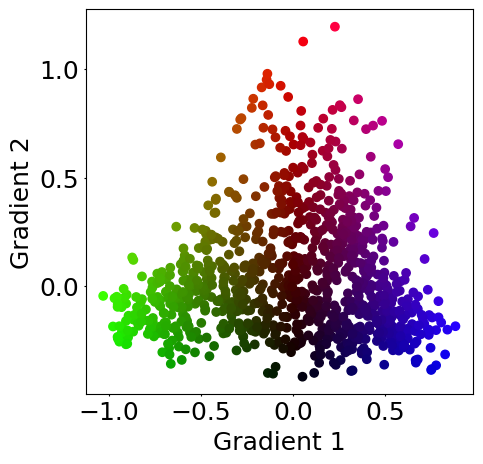

In [355]:
plt.figure(figsize=(5, 5))
plt.scatter(gradient1_hi_stim, gradient2_hi_stim, color=colors)
plt.xlabel('Gradient 1')
plt.ylabel('Gradient 2')

# Rendering supplementary figure

In [382]:
gradients1 = [gradient1_lo, gradient1_lo_stim, gradient1_hi, gradient1_hi_stim]
gradients2 = [gradient2_lo, gradient2_lo_stim, gradient2_hi, gradient2_hi_stim]
centroids = [c_lo, c_lo, c_hi, c_hi]
size = [8, 8, 2.5, 2.5]

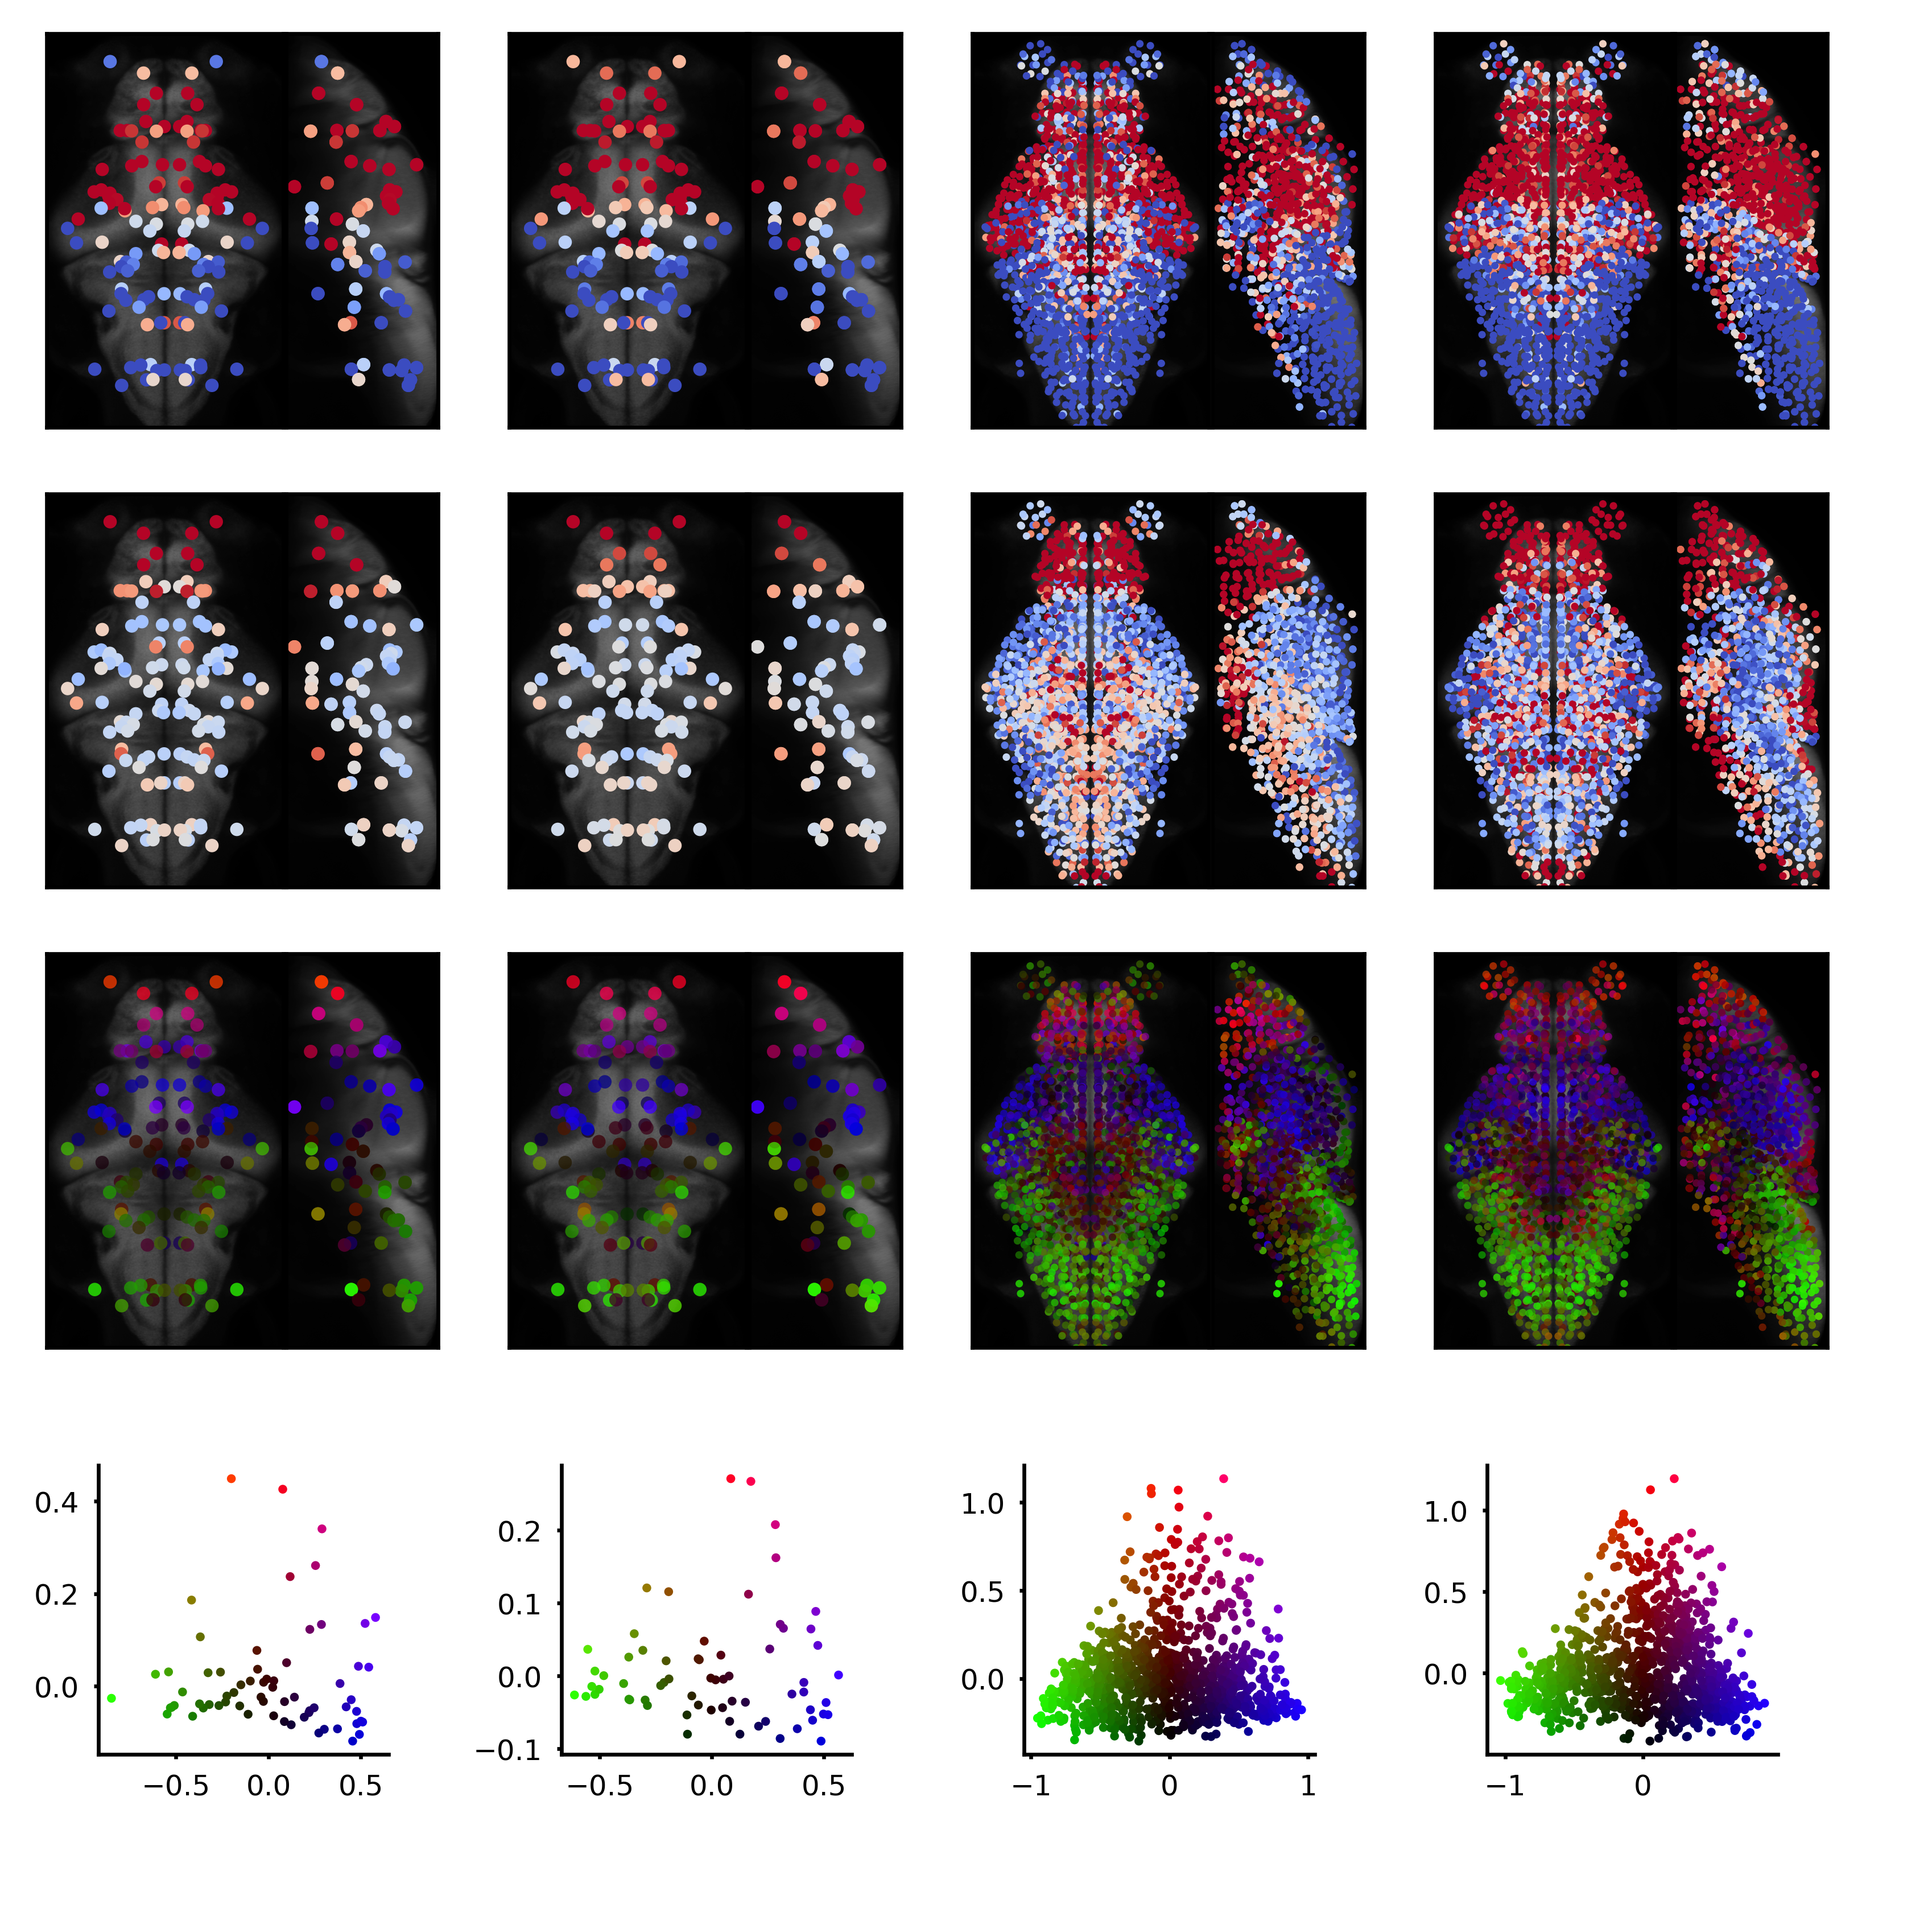

In [385]:
fig = PaperFigure(figsize=(7, 7), dpi=600)

fig.set_tick_length(1)
fig.set_font_size(6)
fig.add_background()

w = 1.5
pad = 0.25
d = 0.2

for i in range(4):
    fig.add_axes(f'gradient1_top_{i}', (i * (w + pad), 0), 0.6 * w, w)
    fig.add_axes(f'gradient1_side_{i}', (i * (w + pad) + 0.6 * w, 0), 0.4 * w, w)
    fig.add_axes(f'gradient2_top_{i}', (i * (w + pad), w + pad), 0.6 * w, w)
    fig.add_axes(f'gradient2_side_{i}', (i * (w + pad) + 0.6 * w, w + pad), 0.4 * w, w)
    fig.add_axes(f'merge_top_{i}', (i * (w + pad), 2 * (w + pad)), 0.6 * w, w)
    fig.add_axes(f'merge_side_{i}', (i * (w + pad) + 0.6 * w, 2 * (w + pad)), 0.4 * w, w)
    fig.add_axes(f'scatter_{i}', (i * (w + pad) + d, 3 * (w + pad) + d), w - 2 * d, w - 2 * d)



for i in range(4):
    gradient1 = gradients1[i]
    gradient2 = gradients2[i]
    c = centroids[i]
    order = np.arange(c.shape[0])
    colors = get_embedding_colors(gradient1, gradient2)
    
    ax = fig.axes[f'gradient1_top_{i}']
    ax.imshow(atlas.XYprojection, cmap='gray', aspect='auto', vmax=200)
    ax.scatter(c[:, 0], c[:, 1], edgecolor='None', c=double(gradient1), cmap='coolwarm', vmin=-0.25, vmax=0.25, s=size[i], rasterized=True)
    ax.set_xlim([65, 505])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'gradient1_side_{i}']
    ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='gray', vmax=200)
    ax.scatter(359 - c[:, 2], c[:, 1], edgecolor='None', c=double(gradient1), cmap='coolwarm', vmin=-0.25, vmax=0.25, s=size[i], rasterized=True)
    ax.set_xlim([50, 359])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'gradient2_top_{i}']
    ax.imshow(atlas.XYprojection, cmap='gray', aspect='auto', vmax=200)
    ax.scatter(c[:, 0], c[:, 1], edgecolor='None', c=double(gradient2), cmap='coolwarm', vmin=-0.25, vmax=0.25, s=size[i], rasterized=True)
    ax.set_xlim([65, 505])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'gradient2_side_{i}']
    ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='gray', vmax=200)
    ax.scatter(359 - c[:, 2], c[:, 1], edgecolor='None', c=double(gradient2), cmap='coolwarm', vmin=-0.25, vmax=0.25, s=size[i], rasterized=True)
    ax.set_xlim([50, 359])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'merge_top_{i}']
    ax.imshow(atlas.XYprojection, cmap='gray', aspect='auto', vmax=200)
    ax.scatter(c[order, 0], c[order, 1], edgecolor='None', color=double(colors)[order], s=size[i], alpha=0.75, rasterized=True)
    ax.set_xlim([65, 505])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'merge_side_{i}']
    ax.imshow(np.rot90(atlas.XZprojection, k=3), cmap='gray', vmax=200)
    ax.scatter(359 - c[order, 2], c[order, 1], edgecolor='None', color=double(colors)[order], s=size[i], alpha=0.75, rasterized=True)
    ax.set_xlim([50, 359])
    ax.set_ylim([850, 50])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.axes[f'scatter_{i}']
    ax.scatter(gradient1, gradient2, color=colors, s=0.75, rasterized=True)
    ax.spines[['top', 'right']].set_visible(False)

fig.show()
%matplotlib inline

In [386]:
fig.save(save_path + 'supp_gradients_unfinished.svg')